In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period_Boyd.dat
2022_Feb_week4_Linear_fit_period_This_work.dat
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
2022_Feb_week4_new_ephemeris_LTT_fit.jpg
DP_Leo_fit.ipynb
DP_Leo_fit.py
DP_Leo_fit_demo.ipynb
DP_Leo_fit_demo2.ipynb
DP_Leo_fit_weighted_mean.ipynb
interporate.out
interporate_dem0.out
interporate_demo.out


In [3]:
DP_Leo = open("2022_Feb_week4_Linear_fit_period_This_work.dat",'r').readlines()
N_dpleo = len(DP_Leo)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("2022_Feb_week4_Linear_fit_period_This_work.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [4]:
#New ephemeris
T0_bjd = 2448773.2148464173
T0_bjd_err = 2.9564294265740673e-09
P0_day = 0.062362845525219396
P0_day_err = 2.6193240365559364e-19

In [5]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo)]
Delta_aT = [i for i in range(N_dpleo)]
Delta_aT_err = [i for i in range(N_dpleo)]
E_af = [i for i in range(N_dpleo)] #float number
E_ak = [i for i in range(N_dpleo)] #integer number
E_aj = [i for i in range(N_dpleo)] #integer number
P_aE = [i for i in range(N_dpleo)]
P_err_aE = [i for i in range(N_dpleo)]
T_aC_linear = [i for i in range(N_dpleo)]
T_aO_linear = [i for i in range(N_dpleo)]
P_aver_a = [i for i in range(N_dpleo)]
P_aver_std_a = [i for i in range(N_dpleo)]

In [6]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("2022_Feb_week4_OC_diagram.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2444214.553250	-73099	2444214.553250	2444214.553201	4.201667	14.687745
1	2444214.615620	-73098	2444214.615620	2444214.615564	4.819809	14.687745
2	2444214.677980	-73097	2444214.677980	2444214.677927	4.573984	14.687745
3	2444968.023090	-61017	2444968.023090	2444968.021101	171.849158	100.223745
4	2444968.957120	-61002	2444968.957120	2444968.956544	49.793373	100.223745
5	2444969.019620	-61001	2444969.019620	2444969.018907	61.643520	100.223745
6	2444978.997550	-60841	2444978.997550	2444978.996962	50.818956	100.223745
7	2444993.900780	-60602	2444993.900780	2444993.901682	-77.924019	59.615745
8	2444993.963280	-60601	2444993.963280	2444993.964045	-66.073872	59.615745
9	2444994.026420	-60600	2444994.026420	2444994.026408	1.072294	59.615745
10	2445020.905130	-60169	2445020.905130	2445020.904794	29.029495	19.871745
11	2445021.902920	-60153	2445021.902920	2445021.902600	27.687840	19.871745
12	2445024.833860	-60106	2445024.833860

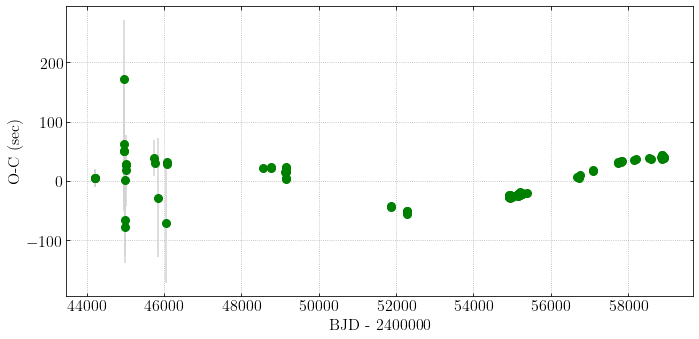

In [7]:
#Plot O-C vs BJD
Input  = '2022_Feb_week4_OC_diagram.out'
Data   = np.genfromtxt(Input)

N_BMJD = 2400000
BJD_time = Data[:,0] - N_BMJD
Cycle = Data[:,1]
T_O_linear = Data[:,2]
T_C_linear = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time)
x2 = max(BJD_time)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - '+str(N_BMJD))
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()

In [8]:
#Read data ---#1
Input = "2022_Feb_week4_OC_diagram.out"
Data   = np.genfromtxt(Input)

 
BJD_time= Data[:,0] - N_BMJD
OC = Data[:,4]
OC_err = Data[:,5]

In [9]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
print(len_x)
print(x)

114
[44214.55325 44214.61562 44214.67798 44968.02309 44968.95712 44969.01962
 44978.99755 44993.90078 44993.96328 44994.02642 45020.90513 45021.90292
 45024.83386 45731.9664  45763.83373 45854.8828  46054.94231 46086.93565
 46086.99796 48560.5578  48773.21509 48774.21293 49137.91294 49143.96214
 49144.02438 49144.08689 49144.96005 49145.02235 49145.08454 49145.14711
 51870.77688 51870.90163 52284.679   52284.67895 52284.74136 54914.83228
 54914.89466 54916.82793 54919.6966  54920.75678 54922.62767 54922.69002
 54922.75237 54922.81473 54937.78183 54937.8442  54938.71729 54938.77961
 54940.65051 54940.71287 54940.77524 54940.83764 54941.77305 54941.83541
 54942.64612 54942.77085 54942.83322 54942.89559 54943.7063  54943.76865
 54943.83101 54970.64703 54970.70941 54993.65893 54998.64798 55005.6326
 55135.97098 55156.9249  55156.98724 55157.92271 55158.98287 55160.91611
 55160.97847 55161.91391 55161.97629 55162.91174 55205.9421  55206.00446
 55206.93992 55207.00231 55208.87317 55209.87098

In [10]:
K = 33.7        #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025     #days

In [11]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [12]:
def solve_kepler(M,e):
    eanom = np.zeros(M.shape)
    for i,mi in enumerate(M):
        # do iterative root solve with e=0 giving E=M as guess
        tmp,=fsolve(lambda E: E-e*np.sin(E)-mi,mi)
        eanom[i] = tmp
    return eanom

In [14]:
def keplerian_fit(t,K,P,e,w,tau):
        e_anomaly = solve_kepler((t-tau)*2*np.pi/P,e)
        theta = 2*np.arctan2(np.sqrt(1.+e)*np.sin(0.5*e_anomaly),
                             np.sqrt(1.-e)*np.cos(0.5*e_anomaly))
        return K*(np.cos(theta+w)+e*np.cos(w))

In [18]:
import scipy.optimize as optimization  
guess = (K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(keplerian_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

K = params[0]
P = params[1]
e = params[2]
w = params[3]
tau = params[4]


dK = params_covariance[0,0]
dP = params_covariance[1,1]
de = params_covariance[2,2]
dw = params_covariance[3,3]
dtau = params_covariance[4,4]

ocfit = keplerian_fit(x,K,P,e,w,tau)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi
    print(K,P,e,w,w_deg,tau)


print("The parameters of egress part")
print("K =", K, "+/-", dK**0.5)
print("P =", P, "+/-", dP**0.5)
print("e =", e, "+/-", de**0.5)
print("w =", w, "+/-", dw**0.5)
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi))
print("tau =", tau, "+/-", dtau**0.5)

The parameters of egress part
K = 48.30300077123826 +/- 0.5026404635251196
P = -13137.089749287872 +/- 119.92243293384205
e = 0.08995848820016898 +/- 0.009759630796512755
w = 3.798423848340865 +/- 0.17685193793206339
w_deg = 217.63365531177186 +/- 10.132869642216823
tau = 38566.89929213042 +/- 349.1760823752138


In [21]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = keplerian_fit(x_line, *params) #### For all interporation 
print(y)
print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

[  4.201667   4.819809   4.573984 171.849158  49.793373  61.64352
  50.818956 -77.924019 -66.073872   1.072294  29.029495  27.68784
  17.860736  38.129264  30.866218 -28.271744 -71.337372  32.363816
  27.797958  22.18958   21.045551  24.023889  14.942989  15.287183
   4.67332   17.387474  24.313527  18.883704   3.949848  21.84796
 -43.515797 -41.415466 -50.924648 -55.244641 -51.170513 -27.598885
 -26.116736 -24.234228 -26.039489 -25.034988 -24.634588 -25.744459
 -26.85433  -27.100155 -25.624926 -25.006784 -24.128777 -27.830628
 -26.566221 -26.812086 -26.193944 -22.983782 -25.807585 -26.05345
 -26.65751  -26.285233 -25.667091 -25.048949 -25.653009 -26.76288
 -27.008745 -27.317695 -25.835547 -26.453608 -24.521855 -26.137416
 -23.298968 -22.961734 -24.935572 -22.575375 -23.298888 -24.008359
 -24.254224 -24.486007 -23.003858 -22.371675 -22.666503 -22.912368
 -21.416178 -19.070023 -21.261603 -20.875244 -23.713088 -22.23098
 -21.93591  -21.668883 -21.050741 -22.006036 -19.462578   5.964482
 

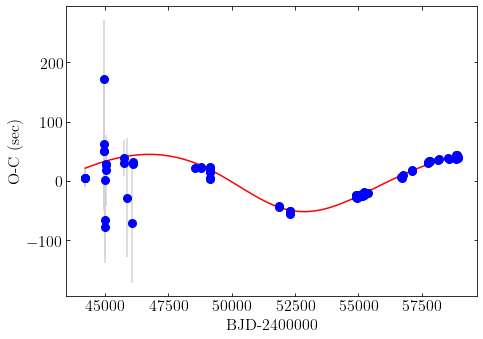

In [22]:
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(7, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r')
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.show()

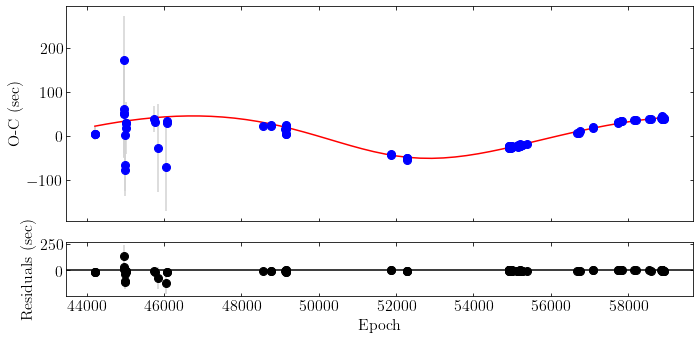

In [24]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red')

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Residual = y-ocfit

ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [35]:
N = 800
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(200, N):
    x_range[i] = i*step
    y_range = keplerian_fit(x_range,K,P,e,w,tau)
    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

20000 43.92654087128864
20100 44.27444604426348
20200 44.54303890009936
20300 44.73097573295107
20400 44.83693665453248
20500 44.85963015103413
20600 44.79779843007077
20700 44.65022360315159
20800 44.4157347500472
20900 44.093215911586974
21000 43.68161505668606
21100 43.179954067582855
21200 42.58733978415306
21300 41.90297614351926
21400 41.12617744474753
21500 40.25638275993386
21600 39.293171502161144
21700 38.23628014735008
21800 37.08562009065549
21900 35.84129659849262
22000 34.5036287942721
22100 33.073170589280494
22200 31.5507324397286
22300 29.937403776771646
22400 28.234575918363884
22500 26.443965230389942
22600 24.567636260037766
22700 22.608024517504994
22800 20.567958533750435
22900 18.45068077332777
23000 16.259866933837337
23100 13.99964311904031
23200 11.6746003332908
23300 9.2898057130749
23400 6.850809889725838
23500 4.363649868592923
23600 1.834846816919508
23700 -0.7286018218623298
23800 -3.31923642330684
23900 -5.9291559531726445
24000 -8.550045787714424
24100 

53300 -50.343206955833956
53400 -49.65436357177476
53500 -48.838412490143604
53600 -47.9008005955223
53700 -46.8472610264988
53800 -45.68375612353672
53900 -44.41642306797485
54000 -43.051522742225686
54100 -41.59539221454228
54200 -40.05440113215639
54300 -38.434912196824946
54400 -36.743245798645695
54500 -34.98564879852025
54600 -33.168267377250466
54700 -31.297123809848124
54800 -29.37809697665513
54900 -27.416906387451277
55000 -25.419099469775066
55100 -23.390041856979988
55200 -21.334910403828484
55300 -19.258688656405948
55400 -17.16616450761341
55500 -15.061929778321034
55600 -12.950381476410096
55700 -10.835724500488979
55800 -8.721975571235523
55900 -6.612968190432816
56000 -4.512358445265348
56100 -2.423631492873129
56200 -0.3501085771799784
56300 1.705045553674705
56400 3.7388149455325763
56500 5.748324553874534
56600 7.730832265476747
56700 9.683720902464527
56800 11.60449027418428
56900 13.490749332491351
57000 15.340208477330778
57100 17.150672051861175
57200 18.9200310

In [36]:
InputFile_out = "interporate.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range = Data_out[:,1]
y_range = Data_out[:,2]

print(y_range)

[ 43.92654  44.27445  44.54304  44.73098  44.83694  44.85963  44.7978
  44.65022  44.41573  44.09322  43.68162  43.17995  42.58734  41.90298
  41.12618  40.25638  39.29317  38.23628  37.08562  35.8413   34.50363
  33.07317  31.55073  29.9374   28.23458  26.44397  24.56764  22.60802
  20.56796  18.45068  16.25987  13.99964  11.6746    9.28981   6.85081
   4.36365   1.83485  -0.7286   -3.31924  -5.92916  -8.55005 -11.17321
 -13.78963 -16.38998 -18.96471 -21.50413 -23.99842 -26.43777 -28.81239
 -31.11268 -33.32922 -35.45294 -37.47512 -39.38754 -41.18251 -42.85298
 -44.39254 -45.79555 -47.05711 -48.17314 -49.14038 -49.95644 -50.61974
 -51.12953 -51.4859  -51.6897  -51.74253 -51.64671 -51.40518 -51.02151
 -50.49979 -49.84461 -49.06097 -48.15423 -47.13006 -45.99437 -44.75325
 -43.41294 -41.97976 -40.46007 -38.86024 -37.18661 -35.44544 -33.64291
 -31.78508 -29.87786 -27.92702 -25.93815 -23.91666 -21.86777 -19.79653
 -17.70777 -15.60613 -13.49606 -11.38181  -9.26745  -7.15686  -5.05375
  -2.96

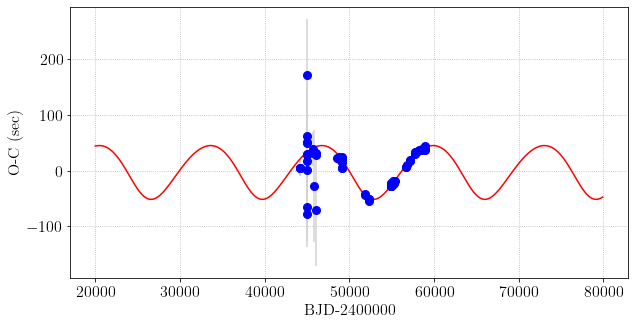

In [37]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_range, y_range, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

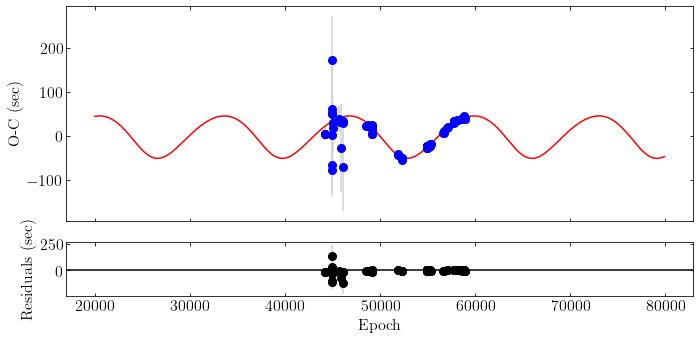

In [39]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_range, y_range, '-', color='red')

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Residual = y-ocfit

ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()